In [3]:
import snowflake.snowpark as snowpark
import os

conn = dict(
    account=os.getenv('SNOWFLAKE_ACCOUNT'),
    database=os.getenv('SNOWFLAKE_DATABASE'),
    schema=os.getenv('SNOWFLAKE_SCHEMA'),
    warehouse=os.getenv('SNOWFLAKE_WAREHOUSE'),
    user=os.getenv('SNOWFLAKE_USER'),
    password=os.getenv('SNOWFLAKE_PASSWORD'),
    role=os.getenv('SNOWFLAKE_ROLE')
    
)

session = snowpark.Session.builder.configs(conn).create()

import generate_relational_tables_from_nested_JSON as Handler
try:
    Handler.snowpark_main_handler(session, 
                                input_relation='PUBLIC.RAW',
                                output_schema='OUTPUT',
                                output_table_prefix='TEMP_',
                                output_table_suffix='_STRUCTURED')
except:
    pass
finally:
    session.close()

2023-08-05 19:54:55,300:START.......... model_nested_JSON_objects parent_path = ENTRY
2023-08-05 19:54:55,920:START.......... flatten_array             array_field = LAPTOPS
2023-08-05 19:54:56,059:SUCCEEDED...... flatten_array             array_field = LAPTOPS
2023-08-05 19:54:57,004:START.......... flatten_array             array_field = DEPARTMENTS
2023-08-05 19:54:57,147:SUCCEEDED...... flatten_array             array_field = DEPARTMENTS
2023-08-05 19:54:57,389:START.......... expand_object_subfields   obj_field = ADDRESS
2023-08-05 19:54:57,580:SUCCEEDED...... expand_object_subfields   obj_field = ADDRESS
2023-08-05 19:54:57,833:START.......... expand_object_subfields   obj_field = CONTACTS
2023-08-05 19:54:58,037:SUCCEEDED...... expand_object_subfields   obj_field = CONTACTS
2023-08-05 19:54:58,040:START.......... model_nested_JSON_objects parent_path = ENTRY
2023-08-05 19:54:59,533:START.......... model_nested_JSON_objects parent_path = ENTRY
2023-08-05 19:54:59,589:WARNING    L

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"ID"  |"NAME"      |"AGE"  |"INGESTION_CTRL"               |"DATASET_SERVICE"  |"LAPTOPS_SHA256"                                    |"DEPARTMENTS_SHA256"                                |"ADDRESS__STATE"  |"ADDRESS__STREET"  |"ADDRESS__ZIP_CODE"  |"ADDRESS__SUBURB"  |"CONTACTS__EMAIL"  |"CONTACTS__PHONE"  |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1     |John Doe    |30     |{                              |202203      

2023-08-05 19:55:07,414:INFO       LINE180   unpack_as_separate_tables.snowpark_main_handler
	Results: TEMP_LAPTOPS_STRUCTURED



------------------------------------------------------------------------------------------
|"LAPTOPS_SHA256"                                    |"LAPTOPS__QTY"  |"LAPTOPS__BRAND"  |
------------------------------------------------------------------------------------------
|c1e9d88c853d0bb6f12fa4fe8064092a77692b5d0a99338...  |2               |"Dell"            |
|76b62193b24292415e45cc3dab6d5592ed993d95c43e429...  |1               |"Dell"            |
|76b62193b24292415e45cc3dab6d5592ed993d95c43e429...  |1               |"Asus"            |
------------------------------------------------------------------------------------------



2023-08-05 19:55:08,151:INFO       LINE180   unpack_as_separate_tables.snowpark_main_handler
	Results: TEMP_DEPARTMENTS_STRUCTURED



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"DEPARTMENTS_SHA256"                                |"DEPARTMENTS__DEPARTMENT_ID"  |"DEPARTMENTS__DEPARTMENT_NAME"  |"DEPARTMENTS__PROJECTS_SHA256"                      |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|52889512d11f6d60317982b9df55c181ff85bcdab03556f...  |102                           |"Marketing"                     |e3ed20d8b3c2c37a5df5a99d0d6c4208160cbf0f8390052...  |
|73b4dd67c6e8b686e6c30a6ee8eaaec058caf7c4633be02...  |101                           |"IT"                            |e07144fd38e4b9e803c22ac2c8e51ae3f20bcc80f76e42d...  |
--------------------------------------------------------------------------------------------------------------------------------------------

2023-08-05 19:55:08,900:INFO       LINE180   unpack_as_separate_tables.snowpark_main_handler
	Results: TEMP_DEPARTMENTS__PROJECTS_STRUCTURED



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"DEPARTMENTS__PROJECTS_SHA256"                      |"DEPARTMENTS__PROJECTS__PROJECT_NAME"  |"DEPARTMENTS__PROJECTS__END_DATE"  |"DEPARTMENTS__PROJECTS__PROJECT_ID"  |"DEPARTMENTS__PROJECTS__START_DATE"  |"DEPARTMENTS__PROJECTS__TASKS_SHA256"               |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|e3ed20d8b3c2c37a5df5a99d0d6c4208160cbf0f8390052...  |"Project C"                            |"2023-07-15"                       |1003                                 |"2023-03-10"                         |dca35f60c29cb4

2023-08-05 19:55:09,650:INFO       LINE180   unpack_as_separate_tables.snowpark_main_handler
	Results: TEMP_DEPARTMENTS__PROJECTS__TASKS_STRUCTURED



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"DEPARTMENTS__PROJECTS__TASKS_SHA256"               |"DEPARTMENTS__PROJECTS__TASKS__STATUS"  |"DEPARTMENTS__PROJECTS__TASKS__TASK_ID"  |"DEPARTMENTS__PROJECTS__TASKS__TASK_NAME"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|dca35f60c29cb429feed4ea19b931e11d847e6fe9f1ea69...  |"Completed"                             |20004                                    |"Task 1"                                   |
|dca35f60c29cb429feed4ea19b931e11d847e6fe9f1ea69...  |"Not Started"                           |20005                                    |"Task 2"                                   |
|9330e03656a1546366c85d4db42e2046b2d6ac221560ef9...  |"Completed"                         

In [ ]:
# SAMPLE SOURCE DATA

[
    {
        "id": 1,
        "name": "John Doe",
        "age": 30,
        "contacts": {
            "email": "John@gm.com",
            "phone": 456366666
        },
        "laptops": [
            {
                "brand": "Dell",
                "qty": 1
            },
            {
                "brand": "Asus",
                "qty": 1
            }
        ],
        "address": {
            "street": "123 Main St",
            "suburb": "ABC Suburb",
            "state": "XYZ State",
            "zip_code": "12345"
        },
        "departments": [
            {
                "department_id": 101,
                "department_name": "IT",
                "projects": [
                    {
                        "project_id": 1001,
                        "project_name": "Project A",
                        "start_date": "2023-01-01",
                        "end_date": "2023-05-30",
                        "tasks": [
                            {
                                "task_id": 20001,
                                "task_name": "Task 1",
                                "status": "Completed"
                            },
                            {
                                "task_id": 20002,
                                "task_name": "Task 2",
                                "status": "In Progress"
                            }
                        ]
                    },
                    {
                        "project_id": 1002,
                        "project_name": "Project B",
                        "start_date": "2023-02-15",
                        "end_date": "2023-06-20",
                        "tasks": [
                            {
                                "task_id": 20003,
                                "task_name": "Task 1",
                                "status": "Completed"
                            }
                        ]
                    }
                ]
            }
        ]
    },
    {
        "id": 2,
        "name": "Jane Smith",
        "age": 28,
        "contacts": {
            "email": "Jane@gm.com",
            "phone": "0456362222"
        },
        "laptops": [
            {
                "brand": "Dell",
                "qty": 2
            }
        ],
        "address": {
            "street": "456 Elm St",
            "suburb": "DEF Suburb",
            "state": "LMN State",
            "zip_code": "67890"
        },
        "departments": [
            {
                "department_id": 102,
                "department_name": "Marketing",
                "projects": [
                    {
                        "project_id": 1003,
                        "project_name": "Project C",
                        "start_date": "2023-03-10",
                        "end_date": "2023-07-15",
                        "tasks": [
                            {
                                "task_id": 20004,
                                "task_name": "Task 1",
                                "status": "Completed"
                            },
                            {
                                "task_id": 20005,
                                "task_name": "Task 2",
                                "status": "Not Started"
                            }
                        ]
                    }
                ]
            }
        ]
    }
]

## DATA MODEL
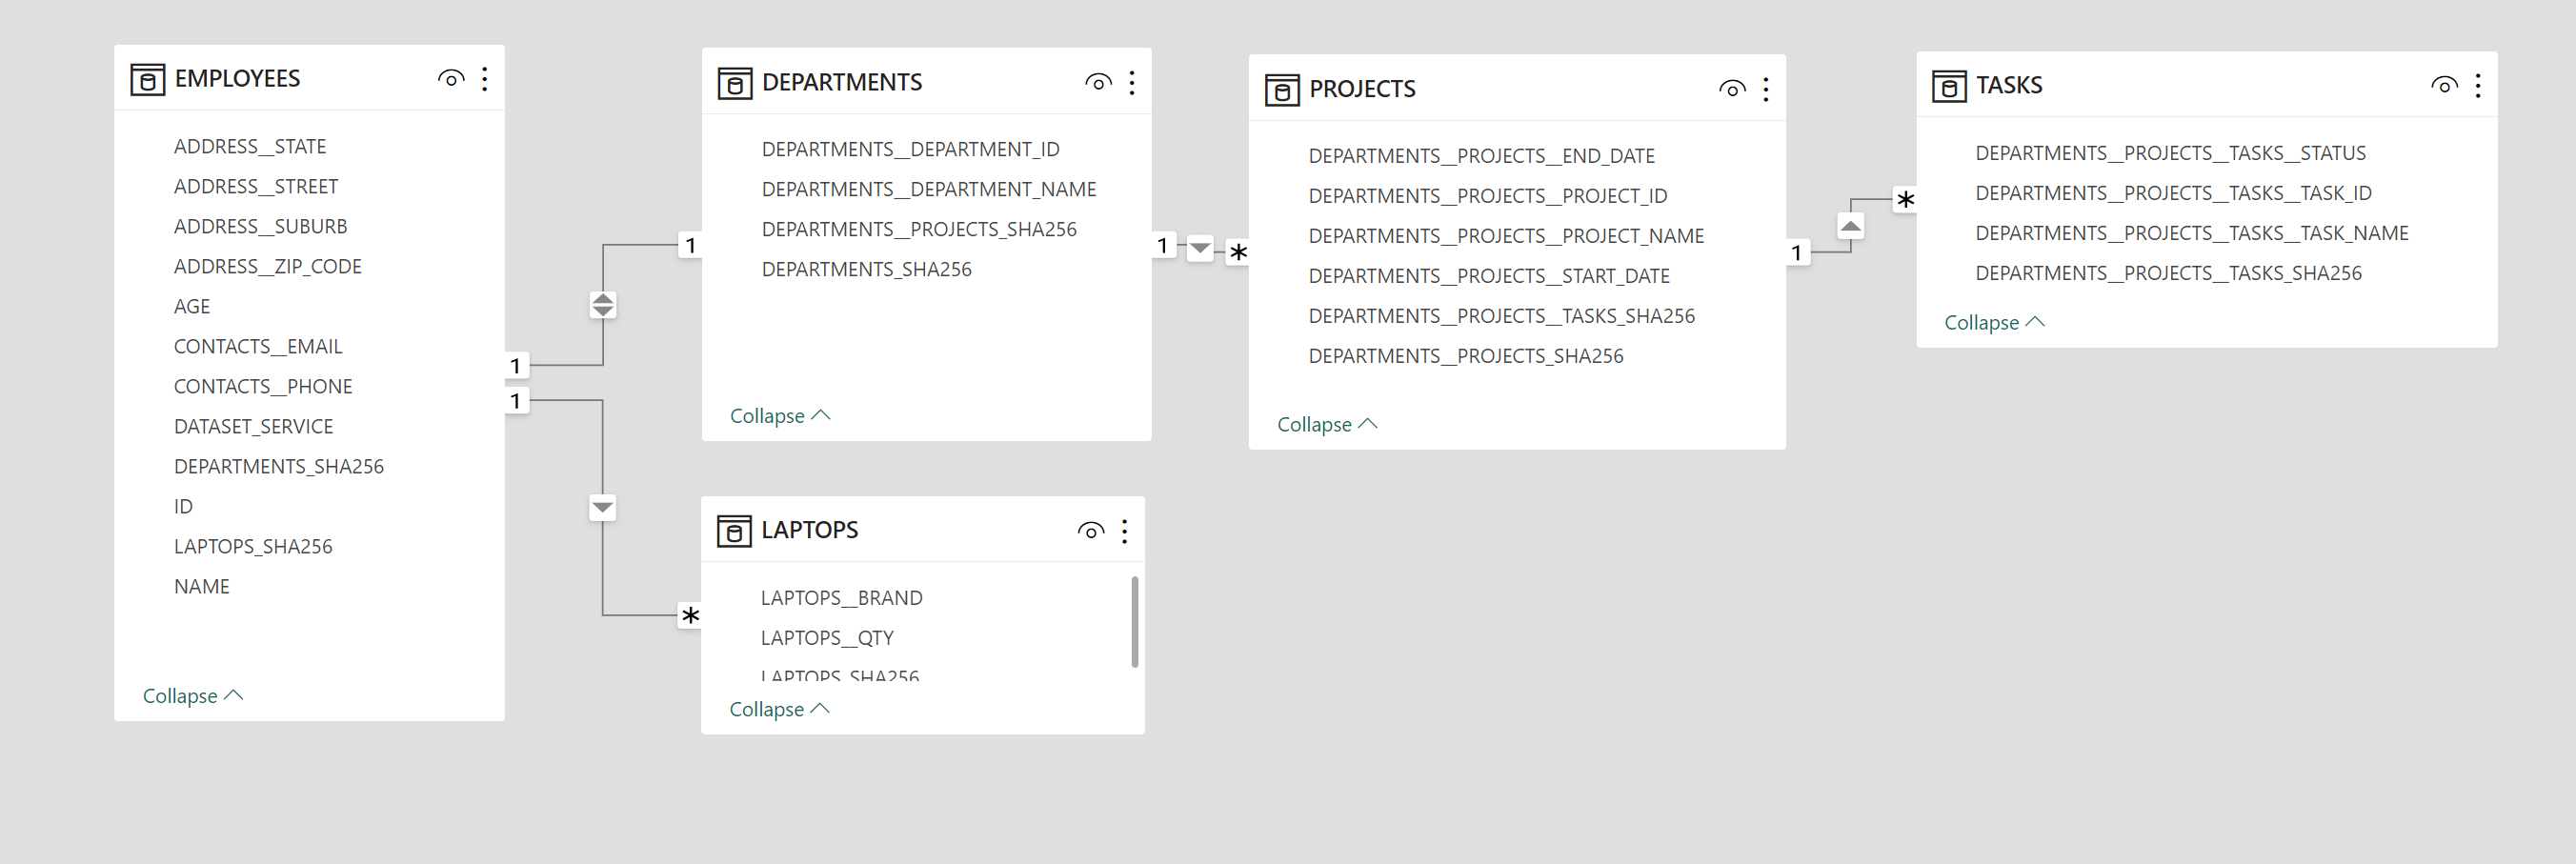

### JOINING RELATIONS VIA SHA256 KEYS TO CONSOLIDATE VIEWS
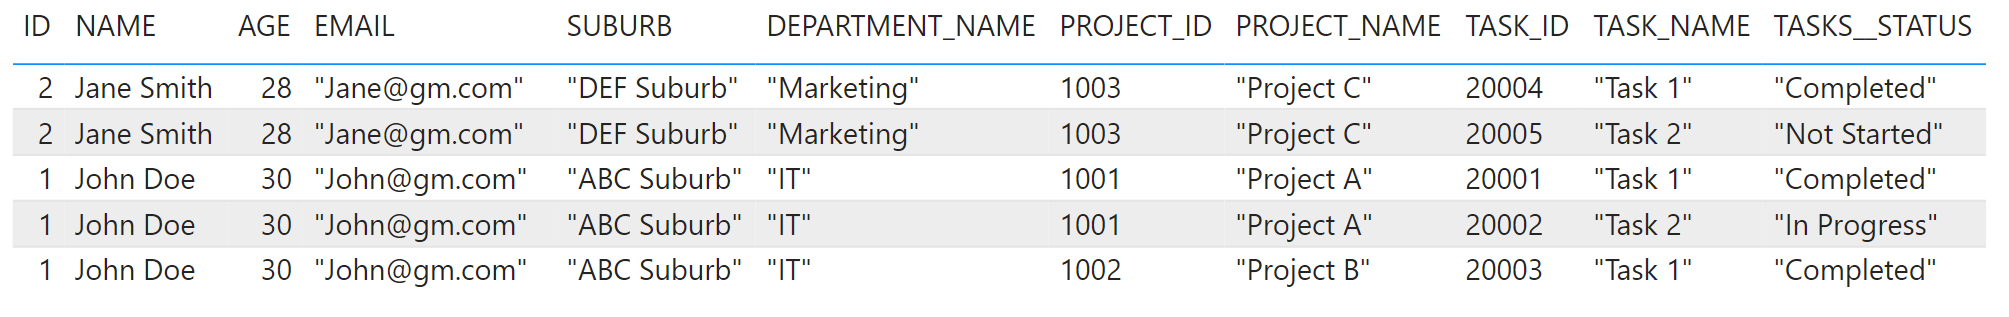